# 6. Fourierova transformácia
Fourierova transformácia (FT) je dôležitým nástrojom pri úprave signálov, ktoré rozkladá na
jednotlivé harmonické zložky. Hovoríme o prechode z časovej (rsp. priestorovej) oblasti do
frekvenčnej oblasti. Pre lepšie pochopenie uvedieme najskôr príklad použitia FT na signále šíriacom
sa pozdĺž jedného rozmeru zloženom z dvoch harmonických zložiek:

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from scipy import signal
from skimage.color import rgb2gray
from skimage import data,io,transform,exposure

plt.rcParams['image.cmap'] = 'gray'

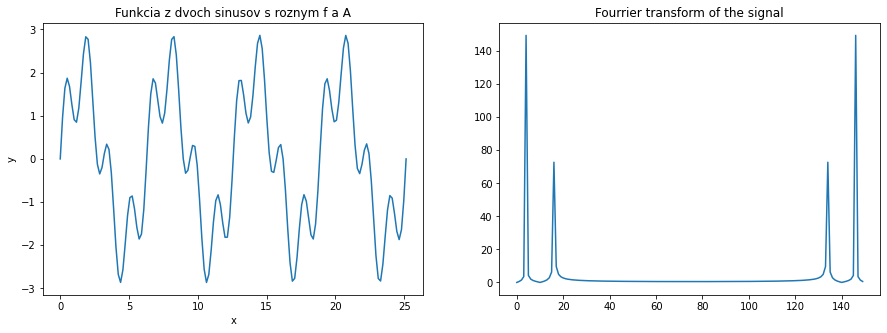

In [2]:
x = np.linspace(0, 8*np.pi, 150)
y_1 = 2*np.sin(x)
y_2 = np.sin(4*x)
y = y_1 + y_2

y_f = fft.fft(y)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Funkcia z dvoch sinusov s roznym f a A')
plt.subplot(122)
plt.title('Fourrier transform of the signal')
plt.plot(np.abs(y_f))

Úpravou frekvenčného spektra pred vykonaním inverznej Fourierovej transformácie môžeme zo
signálu odfiltrovať niektoré harmonické zložky:

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'y')

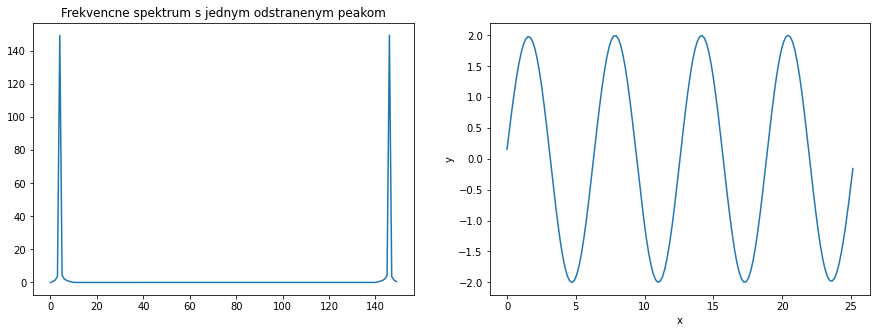

In [5]:
y_f_removed_f = y_f
y_f_removed_f[10:140] = 0  + 0.j
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(np.abs(y_f))
plt.title('Frekvencne spektrum s jednym odstranenym peakom')
plt.subplot(122)
y_t = fft.ifft(y_f)
plt.plot(x,y_t)
plt.xlabel('x')
plt.ylabel('y')


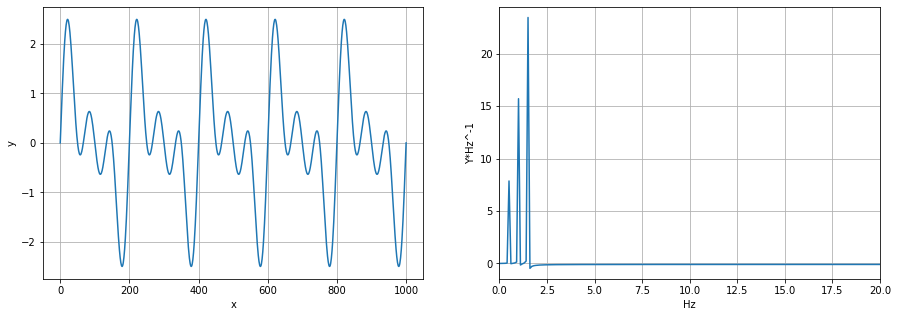

In [6]:
N = 1000
Fs  = 100 # Hz vzorkovacia frekvencia
T = N/Fs

x = np.linspace(0, 10*np.pi, N)

y_1 = np.sin(x) + np.sin(2*x) + np.sin(3*x)


f = np.linspace(0,N-1,N)*Fs/N


plt.figure(figsize=(15,5))
y_f = fft.fft(y_1)

plt.subplot(121)
plt.plot(y_1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.subplot(122)
plt.plot(f,np.real(y_f))
plt.axis([0,20,np.min(np.real(y_f))-1,np.max(np.real(y_f))+1])
plt.xlabel('Hz')
plt.ylabel('Y*Hz^-1')

plt.grid()

(101.0, 151.0)

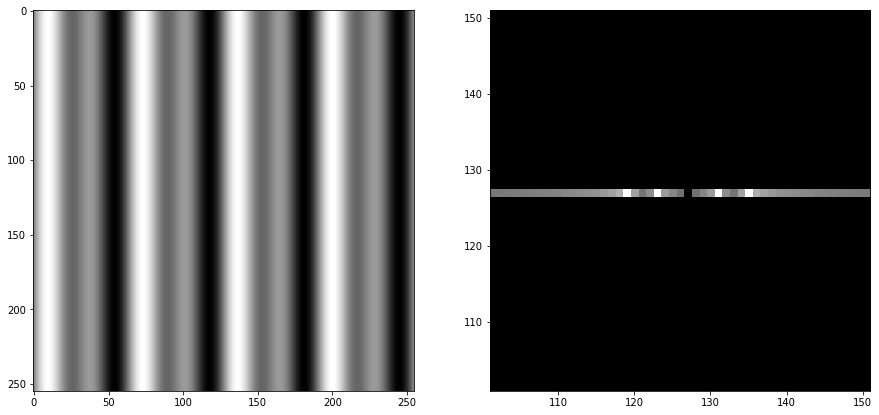

In [43]:
N=255
x = np.array([np.linspace(0,8*np.pi,N)])
y = np.sin(x) + np.sin(2*x)
im = np.repeat(y, 255,axis=0)

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
im_fft= fft.fft2(im)

zero_center_im_fft = fft.fftshift(im_fft)
plt.imshow(np.log(1+np.abs(zero_center_im_fft)))
plt.xlim(101,151)
plt.ylim(101,151)

(101.0, 151.0)

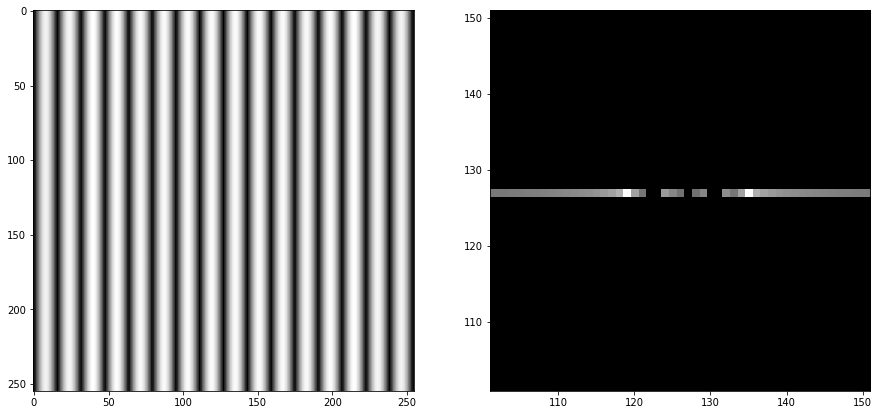

In [44]:
zero_center_im_fft[126:128,122:124] = 0+0.j
zero_center_im_fft[126:128,130:132]= 0+0.j

plt.figure(figsize=(15,10))
plt.subplot(121)
inverse_img = fft.ifft2(zero_center_im_fft)
plt.imshow(np.abs(inverse_img))
plt.subplot(122)
plt.imshow(np.log(1+np.abs(zero_center_im_fft)))
plt.xlim(101,151)
plt.ylim(101,151)

In [ ]:
!wget https://www.bogotobogo.com/Matlab/images/MATLAB_DEMO_IMAGES/fabric.png

float64


Text(0.5, 1.0, 'Amplitudove spectrum')

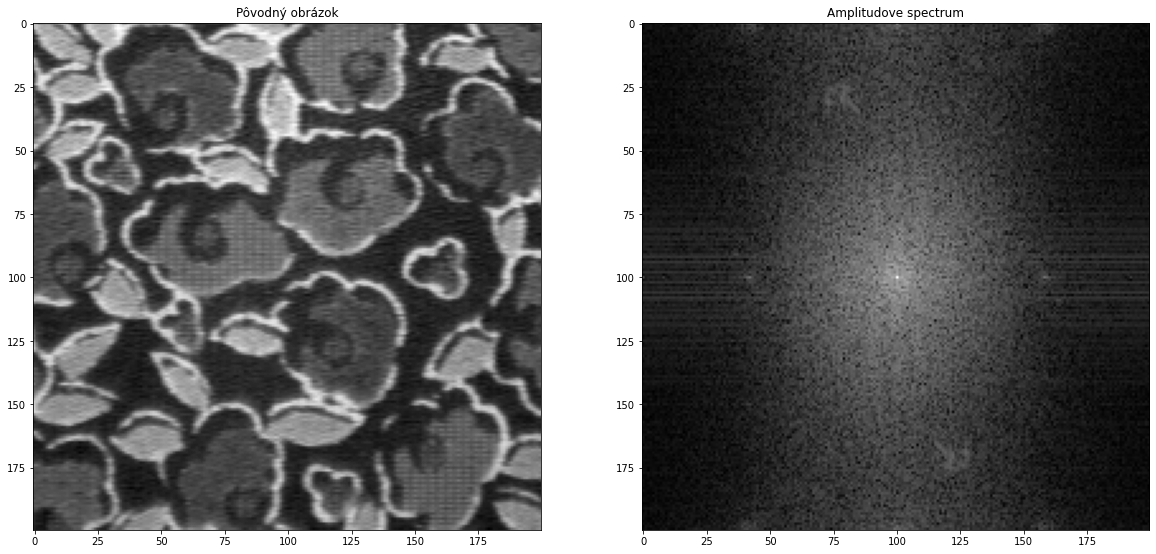

In [63]:
fabric = io.imread("./fabric.png")[140:340,220:420]
im = rgb2gray(fabric)
print(im.dtype)
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.title("Pôvodný obrázok")
plt.subplot(122)
im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
plt.imshow(np.log(1+np.abs(zero_center_im_fft)))
plt.title("Amplitudove spectrum")

Text(0.5, 1.0, 'filtrovany obrázok,dolná priepust')

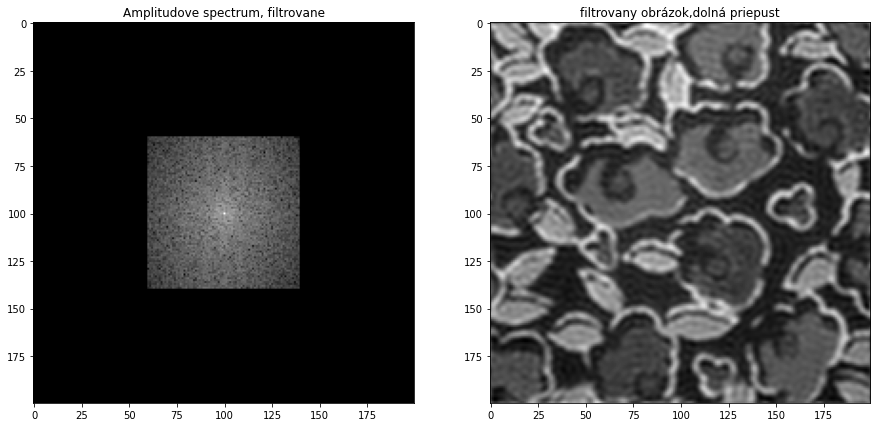

In [62]:
plt.figure(figsize=(15,10))
plt.subplot(121)
pxls = 40

im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
im_size = im.shape
filtered_spectrum = np.zeros(zero_center_im_fft.shape,dtype=np.complex)

filtered_spectrum[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls] =\
    zero_center_im_fft[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls]

plt.imshow(np.log(1+np.abs(filtered_spectrum)))
plt.title("Amplitudove spectrum, filtrovane")
plt.subplot(122)
inverse_img = fft.ifft2(filtered_spectrum)
plt.imshow(np.abs(inverse_img), cmap='gray')
plt.title("filtrovany obrázok,dolná priepust")


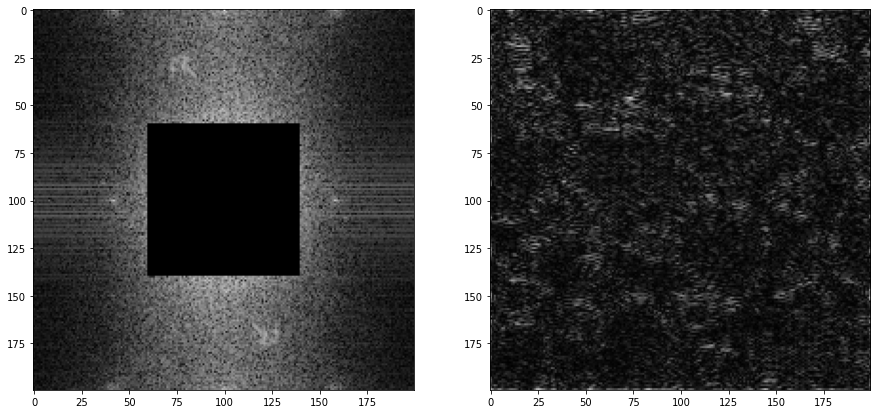

In [59]:
plt.figure(figsize=(15,10))
plt.subplot(121)
pxls = 40

im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
im_size = im.shape
filtered_spectrum = zero_center_im_fft

filtered_spectrum[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls] = 0+0.j
plt.imshow(np.log(1+np.abs(filtered_spectrum)))
plt.subplot(122)
inverse_img = fft.ifft2(filtered_spectrum)
plt.imshow(np.abs(inverse_img), cmap='gray')

# Dokoncit cvicenie v knihe s obrazkami z knihy
# Dorobit bonusovu ulohu

In [ ]:
!wget https://www.bogotobogo.com/Matlab/images/MATLAB_DEMO_IMAGES/text.png

Text(0.5, 1.0, 'Hladany vzor')

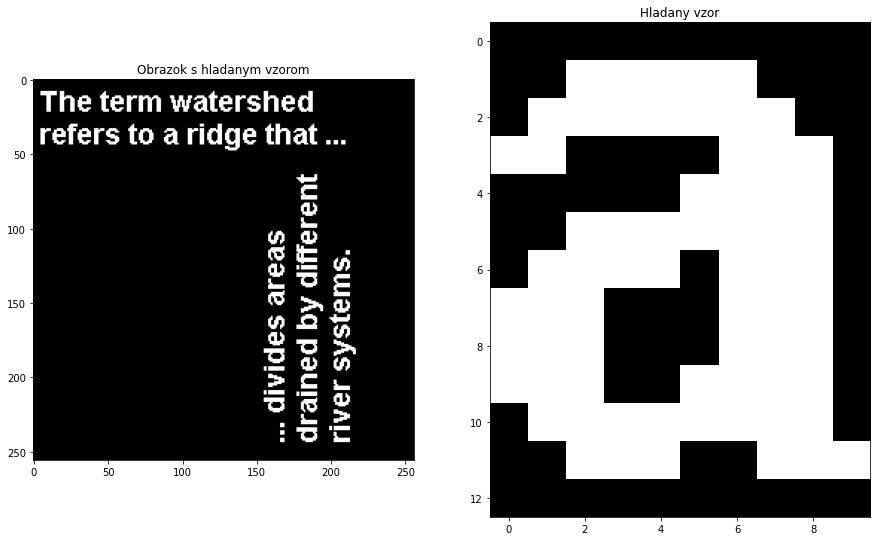

In [113]:
img_text = io.imread("./text.png")
a = img[32:45,88:98]

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(img_text)
plt.title("Obrazok s hladanym vzorom")
plt.subplot(122)
plt.imshow(a)
plt.title("Hladany vzor")




uint8


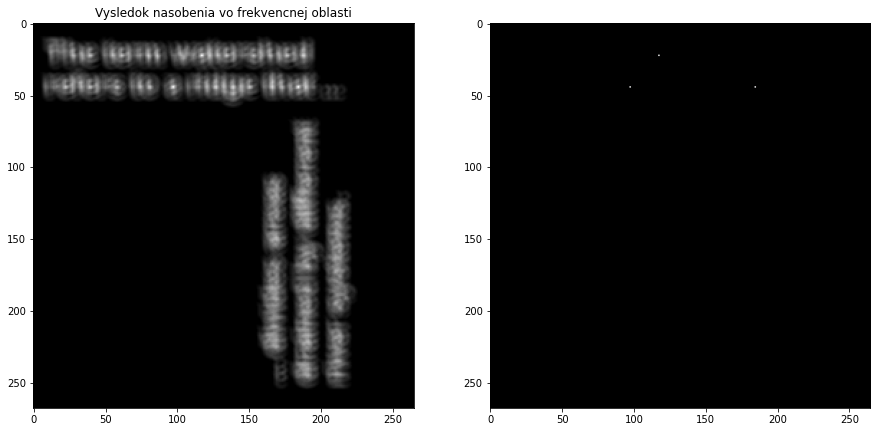

In [116]:
plt.figure(figsize=(15,10))
C = signal.fftconvolve(img_text,transform.rotate(a,180))
print(img_text.dtype)
plt.subplot(121)
plt.imshow(C)
plt.title("Vysledok nasobenia vo frekvencnej oblasti")
plt.subplot(122)
plt.imshow(C>0.95*np.max(C))



In [3]:
!wget https://www.bogotobogo.com/Matlab/images/MATLAB_DEMO_IMAGES/gantrycrane.png

--2020-10-22 17:45:02--  https://www.bogotobogo.com/Matlab/images/MATLAB_DEMO_IMAGES/gantrycrane.png
Resolving www.bogotobogo.com (www.bogotobogo.com)... 173.254.30.214
Connecting to www.bogotobogo.com (www.bogotobogo.com)|173.254.30.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133633 (131K) [image/png]
Saving to: ‘gantrycrane.png’

gantrycrane.png     100%[===================>] 130.50K   738KB/s    in 0.2s    

2020-10-22 17:45:03 (738 KB/s) - ‘gantrycrane.png’ saved [133633/133633]



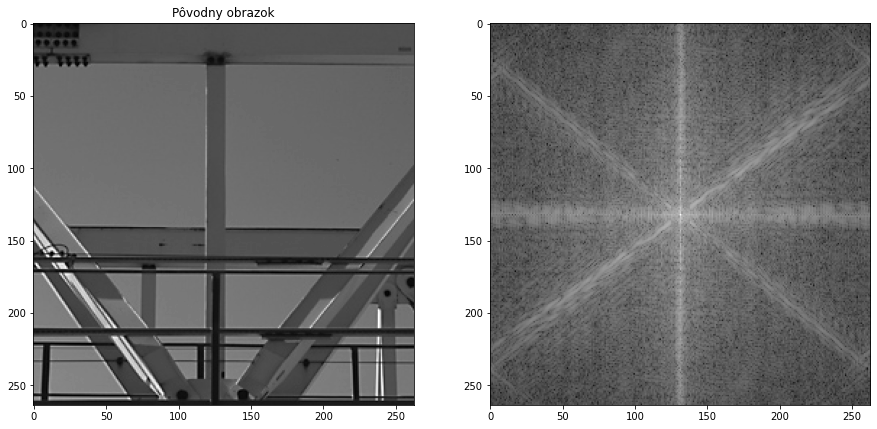

In [124]:
Y = rgb2gray(io.imread("./gantrycrane.png"))
Y = Y[:,69:332]
plt.figure(figsize=(15,10))


plt.subplot(121)
plt.title("Pôvodny obrazok")
plt.imshow(Y)

plt.subplot(122)
im_fft= fft.fft2(Y)
zero_center_im_fft = fft.fftshift(im_fft)
plt.imshow(np.log(np.abs(zero_center_im_fft)))


Text(0.5, 1.0, 'Filtrovany obrazok')

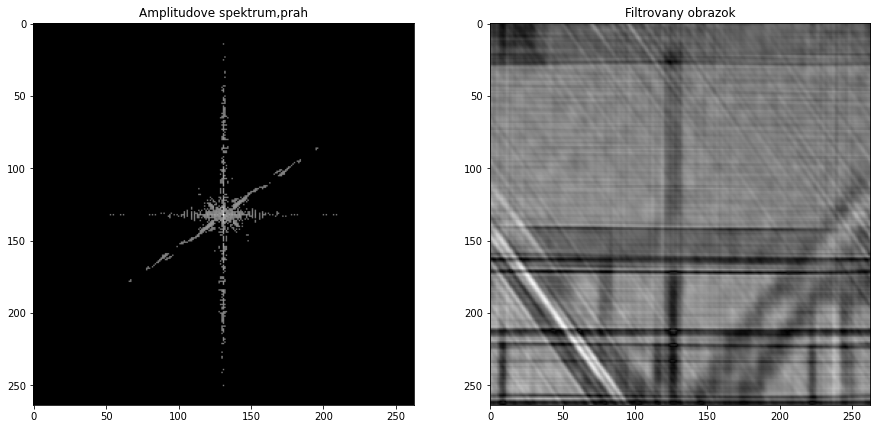

In [129]:
zero_center_im_fft = fft.fftshift(im_fft)
treshold = np.log(np.abs(zero_center_im_fft)) > 0.45*np.max(np.log(np.abs(zero_center_im_fft)))
A = (treshold)*np.log(np.abs(zero_center_im_fft))
zero_center_im_fft = (treshold)*zero_center_im_fft
plt.figure(figsize=(15,10))

plt.subplot(121)
plt.imshow(A)
plt.title("Amplitudove spektrum,prah")
plt.subplot(122)
img = fft.ifft2(zero_center_im_fft)
plt.imshow(np.abs(img))
plt.title("Filtrovany obrazok")

In [ ]:
circl_filter = np.zeros(im_fft.shape)

**ULOHA**

In [ ]:
!git clone https://github.com/stanislav215/computer_vision.git

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


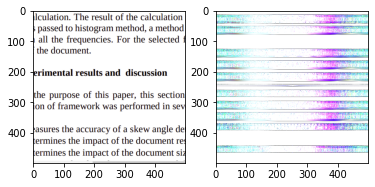

In [153]:
img = io.imread("./computer_vision/imgs/myimg .png")
img = transform.rotate(img,0, resize=True)

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)

im_fft = fft.fft2(img)
zero_center_im_fft = fft.fftshift(im_fft)
plt.imshow(np.log(1+np.abs(zero_center_im_fft)))